# Teuvo

> A Pythonic Self-Organizing Map (SOM) Implementation


TBD

## Design Philosophy

TBD;

<!-- This implementation follows the ["SolveIt"](https://solveit.fast.ai) approach: -->



## Installation

```bash
pip install teuvo
```

## Quick Start

Epoch: 1 | QE: 2.0176, TE: 2.6155
Epoch: 2 | QE: 1.9855, TE: 2.8381
Epoch: 3 | QE: 1.9245, TE: 1.3356
Epoch: 4 | QE: 1.8198, TE: 1.2799
Epoch: 5 | QE: 1.7718, TE: 1.2243
Epoch: 6 | QE: 1.7326, TE: 1.0017
Epoch: 7 | QE: 1.6611, TE: 0.7791
Epoch: 8 | QE: 1.6137, TE: 0.4452
Epoch: 9 | QE: 1.5243, TE: 0.5565
Epoch: 10 | QE: 1.4818, TE: 0.5008
Epoch: 11 | QE: 1.4389, TE: 0.7234
Epoch: 12 | QE: 1.3879, TE: 0.7234
Epoch: 13 | QE: 1.3514, TE: 0.2226
Epoch: 14 | QE: 1.3132, TE: 0.3895
Epoch: 15 | QE: 1.2775, TE: 0.3895
Epoch: 16 | QE: 1.2451, TE: 0.4452
Epoch: 17 | QE: 1.2168, TE: 0.2226
Epoch: 18 | QE: 1.1914, TE: 0.2226
Epoch: 19 | QE: 1.1700, TE: 0.2782
Epoch: 20 | QE: 1.1519, TE: 0.4452


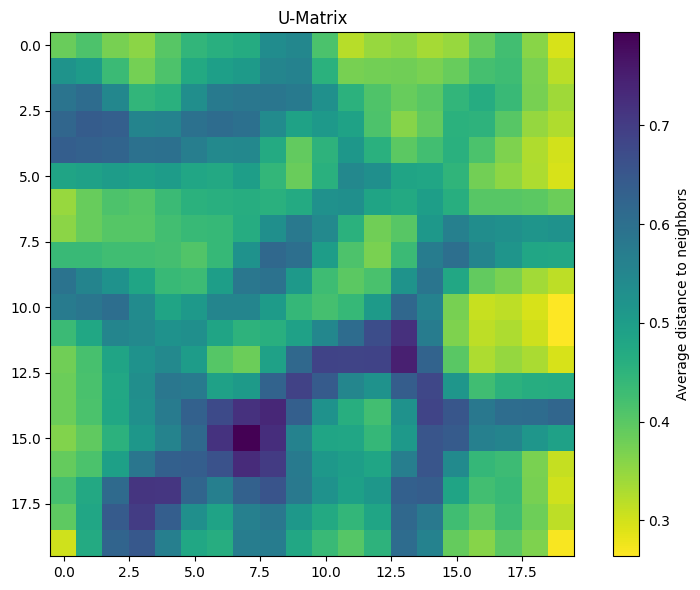

In [ ]:
from teuvo.core import SOM
import numpy as np
from sklearn.datasets import load_digits

# Load and normalize MNIST data
X, y = load_digits(return_X_y=True)
X_norm = (X - np.mean(X, axis=-1, keepdims=True))/X.max()

# Create and train SOM
som = SOM(grid_sz=(20,20), input_dim=64, init='pca')
som.fit(X_norm, n_epochs=20)

# Visualize results
som.plot_umatrix()

## Features

- Multiple initialization methods:
  - Random initialization
  - PCA-based initialization (for faster convergence)
- Flexible training options:
  - Customizable learning rate schedules
  - Adjustable neighborhood functions
- Comprehensive quality metrics:
  - Quantization Error
  - Topographic Error
- Rich visualization tools:
  - U-Matrix visualization
  - Component planes (coming soon)



## Detailed Example: MNIST Digit Classification

Epoch: 1 | QE: 2.1752, TE: 2.8381
Epoch: 2 | QE: 2.0267, TE: 2.3929
Epoch: 3 | QE: 1.8967, TE: 1.7251
Epoch: 4 | QE: 1.8424, TE: 1.6694
Epoch: 5 | QE: 1.7378, TE: 0.3895
Epoch: 6 | QE: 1.6918, TE: 1.1130
Epoch: 7 | QE: 1.6636, TE: 1.6694
Epoch: 8 | QE: 1.6096, TE: 1.2243
Epoch: 9 | QE: 1.5562, TE: 0.7234
Epoch: 10 | QE: 1.4827, TE: 0.7234
Epoch: 11 | QE: 1.4276, TE: 0.4452
Epoch: 12 | QE: 1.3930, TE: 0.4452
Epoch: 13 | QE: 1.3489, TE: 0.6121
Epoch: 14 | QE: 1.3121, TE: 0.5565
Epoch: 15 | QE: 1.2779, TE: 0.2782
Epoch: 16 | QE: 1.2442, TE: 0.5008
Epoch: 17 | QE: 1.2142, TE: 0.5565
Epoch: 18 | QE: 1.1886, TE: 0.3895
Epoch: 19 | QE: 1.1671, TE: 0.6678
Epoch: 20 | QE: 1.1492, TE: 1.0017


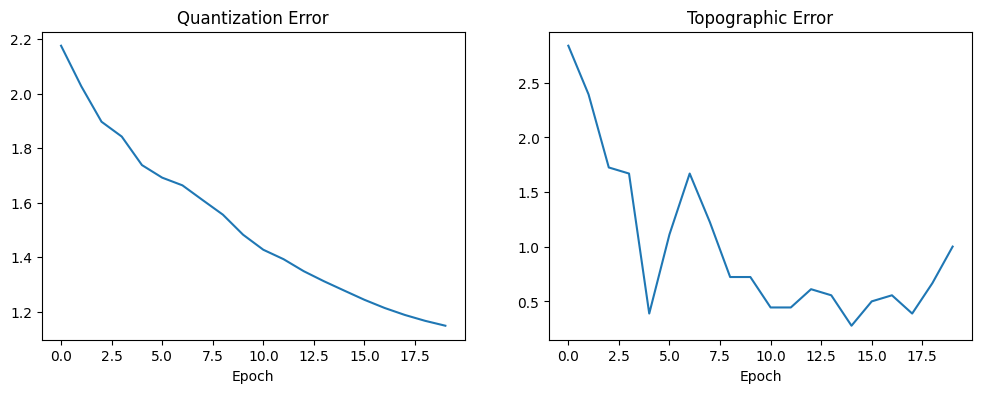

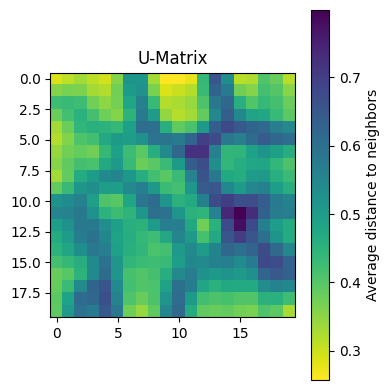

In [ ]:
from teuvo.core import SOM, Scheduler
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load and preprocess data
X, y = load_digits(return_X_y=True)
X_norm = (X - np.mean(X, axis=-1, keepdims=True))/X.max()

# Initialize SOM
som = SOM(
    grid_sz=(20,20),
    input_dim=64,
    init='pca'  # Use PCA initialization
)

# Create custom schedulers
lr_scheduler = Scheduler(start_val=1.0, end_val=0.01, 
                         step_size=200, n_samples=len(X), n_epochs=20)
sigma_scheduler = Scheduler(start_val=10.0, end_val=1.0, 
                            step_size=200, n_samples=len(X), n_epochs=20)

# Train
weights, qe_errors, te_errors = som.fit(
    X_norm,
    n_epochs=20,
    lr_scheduler=lr_scheduler,
    sigma_scheduler=sigma_scheduler
)

# Visualize results
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(qe_errors)
plt.title('Quantization Error')
plt.xlabel('Epoch')

plt.subplot(122)
plt.plot(te_errors)
plt.title('Topographic Error')
plt.xlabel('Epoch')

som.plot_umatrix(figsize=(4,4))
plt.tight_layout();

## Contributing

We welcome contributions! Please see our contributing guidelines for details.


## References

- Kohonen, T. (1982). Self-organized formation of topologically correct feature maps
- Kohonen, T. (2013). Essentials of the self-organizing map
- Polya, G. (1945). How to Solve It


## License

Apache 2.0

## Acknowledgments

Named in honor of Teuvo Kohonen, who introduced the Self-Organizing Map algorithm.